# Seminar 01
---
Based on [Evgeny Sokolov](https://github.com/esokolov) and [YSDA](https://github.com/yandexdataschool) open materials.

# Naive_Bayes

## Loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
matplotlib.rcParams['font.size'] = 11

First to load dataset we're going to use [`sklearn`](https://scikit-learn.org/stable/) package which we will extensively use during the whole course.

`sklearn` implement most of classical and frequently used algorithms in Machine Learning. Also it provides [User Guide](https://scikit-learn.org/stable/user_guide.html) describing principles of every bunch of algorithms implemented.

As an entry point to main `sklearn`'s concepts we recommend [getting started tutorial](https://scikit-learn.org/stable/getting_started.html) (check it out yourself). [Further tutorials](https://scikit-learn.org/stable/tutorial/index.html) can also be handy to develop your skills.

First functionality we use is cosy loading of [common datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). All we need to do is just one function call.

Object generated by [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) is described as:

> Dictionary-like object, the interesting attributes are:
>
> ‘data’, the data to learn,
>
>‘target’, the classification labels,
>
>‘target_names’, the meaning of the labels,
>
>‘feature_names’, the meaning of the features,
>
>‘DESCR’, the full description of the dataset,
>
>‘filename’, the physical location of iris csv dataset (added in version 0.20)

Let's see what we have

In [ ]:
dataset = datasets.load_iris()

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

If you aren't familiar with Iris dataset - take a minute to read description above =) (as always [more info about it in Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set))

__TL;DR__ 150 objects equally distributed over 3 classes each described with 4 continuous features

Just pretty table to look at:

In [ ]:
# for now you don't need to understand what happens in this code - just look at the table
ext_target = dataset.target[:, None]
pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=dataset.feature_names + ['target label', 'target name'],
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target label,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Now give distinct names to the data we will use

In [ ]:
features = dataset.data
target = dataset.target

features.shape, target.shape

((150, 4), (150,))

__Please, remember!!!__

Anywhere in our course we have an agreement to shape design matrix (named `features` in code above) as 

`(#number_of_items, #number_of_features)`

## Visualize dataset

Our dataset has 4 dimensions however humans are more common to 3 or even 2 dimensional data, so let's plot first 3 features colored with labels values

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

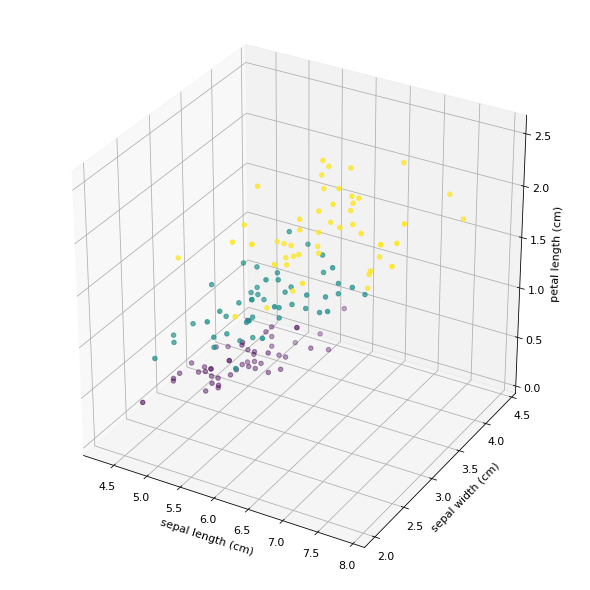

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = Axes3D(fig)

ax.scatter(features[:, 0], features[:, 1], features[:, 3], c=target, marker='o')
ax.set_xlabel(dataset.feature_names[0])
ax.set_ylabel(dataset.feature_names[1])
ax.set_zlabel(dataset.feature_names[2])

plt.show()

In [ ]:
X = pd.DataFrame(features, columns=dataset['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(dataset['target_names'])
y = target
y

['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

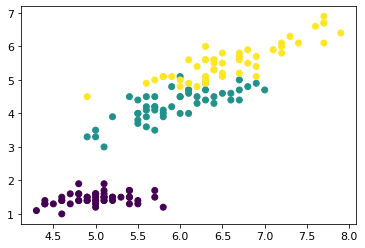

In [ ]:
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c=y)
plt.show()

Then have a look on feature distributions

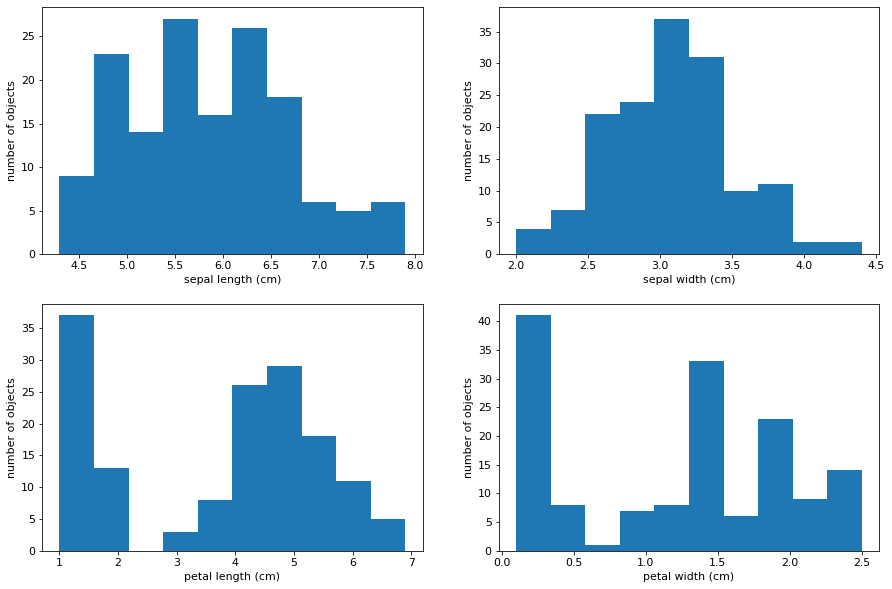

In [ ]:
# remember this way to make subplots! It could be useful for you later in your work

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, axis in enumerate(axes.flat):
    axis.hist(features[:, i])
    axis.set_xlabel(dataset.feature_names[i])
    axis.set_ylabel('number of objects')

Note that every plot above have own scale

## Classifier implementation

Since we aiming to implement Naive Bayes algorithm first we need some prior distribution defined.

The most common distribution is (of course) Gaussian and it's params are mean and standard deviation. Let's implement class taking list of feature values, estimating distribution params and able to give probability density of any given feature value.

Denote the normal distribution $\mathcal{N}(\mu, \sigma^2)$ PDF:
$$
f(x|\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x - \mu)^2}{2\sigma^2})
$$
Let's implement the `GaussianDistribution` class. (Of course in practice one could always use something like `scipy.stats.norm`).

Please note, that making computations with log probabilities is more stable.

In [ ]:
class GaussianDistribution:
    def __init__(self, feature):
        '''
        Args:
            feature: column of design matrix, represents all available values
                of feature to model.
                axis=0 stays for samples.
        '''
        self.mean = feature.mean(axis=0)
        self.std = feature.std(axis=0)

    def logpdf(self, value):
        '''Logarithm of probability density at value'''
    
    def pdf(self, value):


Let's check the result:

In [ ]:
import scipy
_test = scipy.stats.norm(loc=features[:, :2].mean(axis=0), scale=features[:, :2].std(axis=0))
assert np.allclose(
    GaussianDistribution(features[:, :2]).logpdf(features[:5, :2]),
    _test.logpdf(features[:5, :2])
)
print('Seems fine!')

Seems fine!


Let's focus on the classification problem now. For the case of $K$ classes label $y_i \in \{C_1, \ldots, C_k\}$. Iris classification problem has 3 classes, so $K=3$. Bayes' Theorem takes the following form:

$$
P(y_i = C_k|\mathbf{x}_i) = \frac{P(\mathbf{x}_i|y_i = C_k) P(y_i = C_k)}{P(\mathbf{x}_i)}
$$

Please note, we prefer working with log probabilities here as well. So the equation above will take the following form:
$$
\log P(y_i = C_k|\mathbf{x}_i) = \log P(\mathbf{x}_i|y_i = C_k) + \log P(y_i = C_k) - \log P(\mathbf{x}_i)
$$

As one could mention, to find the class label with the highest probability we even do not need the last term $P(\mathbf{x}_i)$. However, we need it to get the correct estimation of the probability $P(y_i = C_k|\mathbf{x}_i)$. The $P(\mathbf{x}_i)$ term can be computed using the following property:
$$
P(\mathbf{x}_i) = \sum_{k=1}^K P(\mathbf{x}_i|y_i=C_k).
$$
It can be computed from $\log P(\mathbf{x}_i|y_i=C_k)$ values using `logsumexp` function located in `scipy.special`.

Now let's implement the Naive Bayes classifier itself. The class below is inherited from `sklearn` base classes and provides all the main methods.

In [ ]:
features.shape[1]

4

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import logsumexp


class NaiveBayes(BaseEstimator, ClassifierMixin):
    '''
    Please note, using `X` and `y` for design matrix and labels in general is not a good choice,
    better stick to more informative naming conventions.
    However, to make the code consistent with sklearn implementation, we use `X` and `y` variables here.
    '''
    def fit(self, X, y, sample_weight=None, distributions=None):
        '''
        sample_weight 
            The argument is ignored. For comatibility only.
        '''
        self.unique_labels = np.unique(y)
        
        # If distributions of features are not specified, they a treated Gaussian
        if distributions is None:
            distributions = [GaussianDistribution] * X.shape[1]
        else:
            # Check whether distributions are passed for all features
            assert len(distributions) == X.shape[1]        

        # Here we find distribution parameters for every feature in every class subset
        # so P(x^i|y=C_k) will be estimated only using information from i-th feature of C_k class values
        self.conditional_feature_distributions = {} # label: [distribution for feature 1, ...]
        for label in self.unique_labels:
            feature_distribution = []
            for column_index in range(X.shape[1]):
                # `column_index` feature values for objects from `label` class
                feature_column = X[y == label, column_index]
                fitted_distr = distributions[column_index](feature_column)
                feature_distribution.append(fitted_distr)
            self.conditional_feature_distributions[label] = feature_distribution

        # Prior label distributions (unconditional probability of each class)
        self.prior_label_distibution = {
            # <YOUR CODE HERE>

        }

    def predict_log_proba(self, X):
        # Matrix of shape (n_objects : n_classes)
        class_log_probas = np.zeros((X.shape[0], len(self.unique_labels)), dtype=float)
        
        # Here we compute the class log probabilities for each class sequentially b
        for label_idx, label in enumerate(self.unique_labels):
            for idx in range(X.shape[1]):
                # All loglikelihood for every feature w.r.t. fixed label

            # Add log proba of label prior

        for idx in range(X.shape[1]):
        # If you want to get probabilities, you need to substract the log proba for every feature
        return class_log_probas
    
    def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))
    
    def predict(self, X):
        log_probas = self.predict_log_proba(X)
        # we need to cast labels to their original form (they may start from number other than 0)
        return np.array([self.unique_labels[idx] for idx in log_probas.argmax(axis=1)])

In [ ]:
nb = NaiveBayes()
nb.fit(features, target)
print('log probas:\n{}'.format(nb.predict_log_proba(features[:2])))
print('predicted labels:\n{}'.format(nb.predict(features[:2])))
print('\nIt`s alive! More tests coming.')

log probas:
[[  0.         -41.14063634 -57.90531295]
 [  0.         -38.72865982 -56.71097942]]
predicted labels:
[0 0]

It`s alive! More tests coming.


Now let's check our Naive Bayes classifier on the unseed data. To do so we will use `train_test_split` from `sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25)

print(features_train.shape, features_test.shape)

(112, 4) (38, 4)


In [ ]:
nb = NaiveBayes()
nb.fit(features_train, target_train, distributions=[GaussianDistribution]*4)
nb_test_log_proba = nb.predict_log_proba(features_test)

In [ ]:
print('Naive Bayes classifier accuracy on the train set: {}'.format(nb.score(features_train, target_train)))

Naive Bayes classifier accuracy on the train set: 0.9642857142857143


In [ ]:
print('Naive Bayes classifier accuracy on the test set: {}'.format(nb.score(features_test, target_test)))

Naive Bayes classifier accuracy on the test set: 0.9736842105263158


Finally, let's comapre the Naive Bayes classifier with the `sklearn` implementations.

In [ ]:
from sklearn import naive_bayes

sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(features_train, target_train)
sklearn_nb_test_log_proba = sklearn_nb.predict_log_proba(features_test)

In [ ]:
print('sklearn implementation accuracy on the train set: {}'.format(sklearn_nb.score(features_train, target_train)))

sklearn implementation accuracy on the train set: 0.9642857142857143


In [ ]:
print('sklearn implementation accuracy on the test set: {}'.format(sklearn_nb.score(features_test, target_test)))

sklearn implementation accuracy on the test set: 0.9736842105263158


And let's even check the predictions. If you used Gaussian distribution and done everything correctly, the log probabilities should be the same.

In [ ]:
assert np.allclose(nb_test_log_proba, sklearn_nb_test_log_proba), 'log probabilities do not match'
print('Seems alright!')

Seems alright!


# kNN - метод ближайших соседей

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[['sepal length (cm)', 'petal length (cm)']], y,
                                                    train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [ ]:
knn = KNeighborsClassifier() # По умочанию - 5 соседей и Евклидова метрика

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = pd.DataFrame(knn.predict(X_test), columns=['predict'])
pred['test'] = y_test

In [ ]:
pred

,predict,test
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,1,2
8,1,1
9,1,1


In [ ]:
accuracy_score(knn.predict(X_test), y_test)

0.9666666666666667

In [ ]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test), y_test)

0.9333333333333333

In [ ]:
knn = KNeighborsClassifier(80)
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test), y_test)

0.6333333333333333

#### Ваш ход...

In [ ]:
# Примените kNN для данных по всем признакам, какую метрику качества на тесте вы достигаете? 

# Ваш код здесь

# kNN from scratch

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [ ]:
from sklearn.datasets import load_digits

# Загрузим и визуализируем данные

In [ ]:
dataset = datasets.load_digits()

print(dataset.DESCR)
features = dataset.data
target = dataset.target

features.shape, target.shape

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

((1797, 64), (1797,))

In [ ]:
len(target)

1797

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.25)

print(train_X.shape, train_y.shape)

(1347, 64) (1347,)


In [ ]:
test_X

array([[ 0.,  0.,  5., ..., 13., 12.,  4.],
       [ 0.,  3., 15., ..., 13.,  3.,  0.],
       [ 0.,  1.,  7., ..., 16.,  7.,  0.],
       ...,
       [ 0.,  0.,  6., ...,  8.,  0.,  0.],
       [ 0.,  0.,  2., ...,  8.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.]])

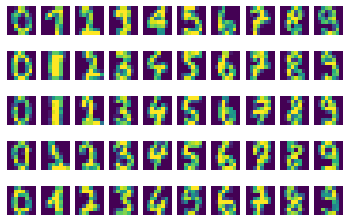

In [ ]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index].reshape((8,8))
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [ ]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [ ]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

In [ ]:
# TODO: implement compute_distances_two_loops
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [ ]:
# TODO: implement compute_distances_one_loop
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [ ]:
# TODO: implement compute_distances_no_loops
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [ ]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

10 loops, best of 5: 162 ms per loop
100 loops, best of 5: 3.56 ms per loop
100 loops, best of 5: 9.17 ms per loop


In [ ]:
# TODO: implement predict_labels_binary
prediction = knn_classifier.predict(binary_test_X)

In [ ]:
a = np.array([True, False, False, True, True])
unique, counts = np.unique(a, return_counts=True)
unique[np.argmax(counts)]

True

In [ ]:
# TODO: implement binary_classification_metrics
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


In [ ]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [ ]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = np.array(np.split(binary_train_X, np.linspace(0, len(binary_train_y), num_folds+1, dtype =int)[1:-1]))
train_folds_y = np.array(np.split(binary_train_y, np.linspace(0, len(binary_train_y), num_folds+1, dtype =int)[1:-1]))
#print(train_folds_X[0].shape, train_X.shape)
# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
for k in k_choices:
    _f1 = np.zeros(num_folds)
    for fold in range(num_folds):
        _train_x = np.concatenate(np.delete(train_folds_X[:], fold, 0))
        _test_x = train_folds_X[fold]
        _train_y = np.concatenate(np.delete(train_folds_y[:], fold, 0))
        _test_y = train_folds_y[fold]
       

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


k = 1, f1 = 1.000000
k = 2, f1 = 1.000000
k = 3, f1 = 1.000000
k = 4, f1 = 1.000000
k = 5, f1 = 1.000000
k = 6, f1 = 1.000000
k = 7, f1 = 1.000000
k = 8, f1 = 1.000000
k = 9, f1 = 1.000000
k = 10, f1 = 1.000000
k = 15, f1 = 1.000000
k = 20, f1 = 1.000000
k = 25, f1 = 1.000000
k = 50, f1 = 0.995556


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [ ]:
# TODO Set the best k to the best value found by cross-validation
import operator
best_k = 

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 1
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [ ]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [ ]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [ ]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.98


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [ ]:
%%time
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = np.array(np.split(train_X, np.linspace(0, len(train_y), num_folds+1, dtype =int)[1:-1]))
train_folds_y = np.array(np.split(train_y, np.linspace(0, len(train_y), num_folds+1, dtype =int)[1:-1]))

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    _acc = np.zeros(num_folds)
    for fold in range(num_folds):
        _train_x = np.concatenate(np.delete(train_folds_X[:], fold, 0))
        _test_x = train_folds_X[fold]
        _train_y = np.concatenate(np.delete(train_folds_y[:], fold, 0))
        _test_y = train_folds_y[fold]



for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


k = 1, accuracy = 0.985896
k = 2, accuracy = 0.972532
k = 3, accuracy = 0.981440
k = 5, accuracy = 0.981446
k = 8, accuracy = 0.976252
k = 10, accuracy = 0.971053
k = 15, accuracy = 0.968826
k = 20, accuracy = 0.959160
k = 25, accuracy = 0.956186
k = 50, accuracy = 0.927245
CPU times: user 1min 43s, sys: 149 ms, total: 1min 43s
Wall time: 1min 43s


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [ ]:
best_k = max(k_to_accuracy.items(), key=operator.itemgetter(1))[0]

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f" % accuracy)

Best KNN with k = 1
Accuracy: 0.98
